In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plot
import skimage.exposure 
import scipy.signal

### Imagem de ultrassom


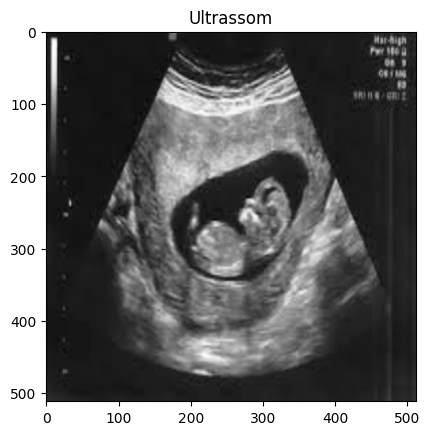

In [2]:
ultra = cv2.imread(r"C:\Unifesp\imagens_biomedicas\filtro_de_lee\UltrassomBebe.pgm",0)
ultra = skimage.img_as_float(ultra)

plot.figure()
plot.title('Ultrassom')
plot.imshow(ultra, cmap='gray')

Obter Linhamin, Lmax, Colunamin, Cmax da região selecionada.


**Observação:** A função cv2.selectROI retorna uma tupla com 4 valores inteiros (x, y, w, h)

x: coordenada horizontal do canto superior esquerdo.

y: coordenada vertical do canto superior esquerdo.

w : largura do retângulo.

h : altura do retângulo.

In [3]:
roi = cv2.selectROI(ultra)
c_min = roi[0]
l_min = roi[1]
c_max = roi[0] + roi[2]
l_max = roi[1] + roi[3]

print(f'C_mín:{c_min}, L_min:{l_min}, C_max:{c_max}, L_max:{l_max}')


C_mín:169, L_min:143, C_max:233, L_max:199


Média e variância da região selecionada

In [4]:
media = np.mean(ultra[l_min:l_max, c_min:c_max])
print(f'Média:{media}')
# Variância da área selecionada.
var_reg_homo = np.var(ultra[l_min:l_max, c_min:c_max])
print(f'Variância: {var_reg_homo}')

Média:0.6990524334733894
Variância: 0.006747759914129562


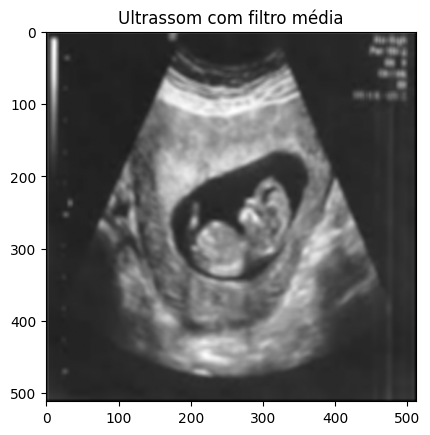

In [5]:
#máscara 7x7
kernel = np.ones((7,7), float)/49
# Filtro média
mean_image = scipy.signal.convolve2d(ultra, kernel, 'same') # -> 'same': garante que a imagem de saída tenha o mesmo tamanho que a original.
plot.figure()
plot.title('Ultrassom com filtro média')
plot.imshow(mean_image, cmap = 'gray')



C:\Users\sarah\AppData\Local\Temp\ipykernel_18872\2278274003.py:8: RuntimeWarning: divide by zero encountered in divide
  k = 1 - (var_reg_homo/var_local)


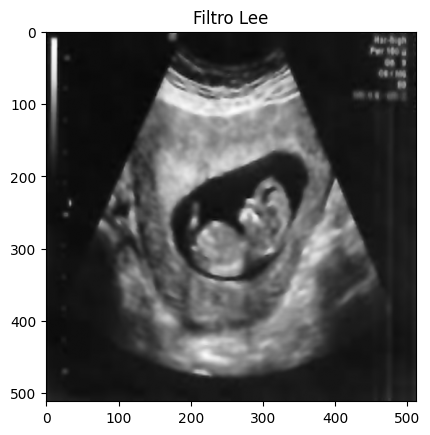

: 

In [ ]:
(M,N) = np.shape(ultra)
var_local = np.ones((M,N),float)

for i in range(M-7):
    for j in range(N-7):
        var_local[i+3, j+3] = np.var(ultra[i: i+7, j: j+7])

k = 1 - (var_reg_homo/var_local)
k = np.clip(k, 0,  1)
lee = mean_image + k * (ultra - mean_image)

plot.figure()
plot.title('Filtro Lee')
plot.imshow(lee, cmap = 'gray')